In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
X = diabetes.data
Y = diabetes.target

In [4]:
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
X.shape

(442, 10)

In [6]:
X_ = np.append(X,np.ones(X.shape[0]).reshape(-1,1),axis=1)

In [7]:
X_.shape

(442, 11)

In [8]:
pd.DataFrame(X_).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.0
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,1.0
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,0.0
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,1.0
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,1.0
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,1.0
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,1.0
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,1.0


In [9]:
def cost(X_train,m,Y_train):
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        cost_ += (1/N)*((Y_train[i]-((X_train[i]*m).sum()))**2)
    return cost_

In [10]:
def step_gradient(X_train,Y_train,m,lr):
    
    slope_m = np.zeros(X_train.shape[1])
    N = X_train.shape[0]
    
    for i in range(N):
        slope_m += (2/N)*(Y_train[i]-(m*X_train[i]).sum())*(-X_train[i])
        
    m = m - (lr * slope_m)
    
    return m

In [66]:
def fit(X_train,Y_train,lr=0.001,epochs=100,verbose=False):
    m = np.zeros(X_train.shape[1])
    last_m = m
    cost_array = []
    unit = epochs//100
    for i in range(epochs+1):
        last_m = m
        m = step_gradient(X_train,Y_train,m,lr)
        cost_ = cost(X_train,m,Y_train)
        cost_array.append(cost_)
        if verbose and i%unit==0:
            print("epoch:",i,"cost:",cost_)
    return m,cost_array

In [12]:
def predict(X_test,m):
    y_pred = []
    for i in range(X_test.shape[0]):
        y_pred.append((X_test[i]*m).sum())
    return np.array(y_pred)

In [13]:
def score(Y_true,Y_pred):
    u = ((Y_true-Y_pred)**2).sum()
    v = ((Y_true-(Y_true.mean()))**2).sum()
    return 1-(u/v)

In [67]:
m, cost_array = fit(X_,Y,epochs=15000,lr=0.8,verbose=True)
print(m)

epoch: 0 cost: 14199.714242105505
epoch: 150 cost: 3299.318051946801
epoch: 300 cost: 3020.1461889019647
epoch: 450 cost: 2932.8976797169516
epoch: 600 cost: 2901.717005247155
epoch: 750 cost: 2889.828745970443
epoch: 900 cost: 2884.958350008822
epoch: 1050 cost: 2882.775216825171
epoch: 1200 cost: 2881.678257973675
epoch: 1350 cost: 2881.046462309746
epoch: 1500 cost: 2880.626285424782
epoch: 1650 cost: 2880.3084448175246
epoch: 1800 cost: 2880.0431943932635
epoch: 1950 cost: 2879.8066894245135
epoch: 2100 cost: 2879.5869608145995
epoch: 2250 cost: 2879.377755722979
epoch: 2400 cost: 2879.175691263493
epoch: 2550 cost: 2878.9788764853847
epoch: 2700 cost: 2878.7862181622436
epoch: 2850 cost: 2878.5970596328552
epoch: 3000 cost: 2878.410988102733
epoch: 3150 cost: 2878.2277297711066
epoch: 3300 cost: 2878.047091832145
epoch: 3450 cost: 2877.8689299499456
epoch: 3600 cost: 2877.693129774544
epoch: 3750 cost: 2877.519596287304
epoch: 3900 cost: 2877.3482475563997
epoch: 4050 cost: 2877.1

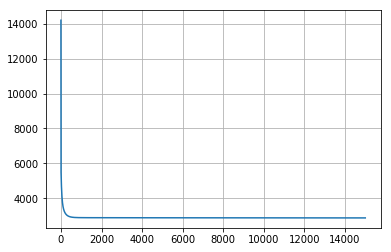

In [68]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [69]:
y_pred = predict(X_,m)
y_pred.shape

(442,)

In [70]:
score(Y,y_pred)

0.5162595902022233

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
alg = LinearRegression()

In [73]:
alg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
alg.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [75]:
alg.intercept_

152.1334841628965

In [76]:
alg.score(X,Y)

0.5177494254132934